#  실제 파노라마 이미지의 image pixel shape을 토대로 slicing을 다시 진행

## 1. Load panoramic x-ray image 

In [1]:
import cv2
import os
import numpy as np
import glob

In [2]:
ct_root = "C:/Users/Heeguen/Desktop/heeguen/Dental_panorama_2020/image_parts/npy/"

ct_path = glob.glob(ct_root+'*.npy')

ct_list = []
for path in ct_path:
    ct_list.append(np.load(path))
    
tot = ct_list[0]

for i in range(len(ct_list)-1):
    tot = np.concatenate((tot, ct_list[i+1]), axis=1)
    


(180, 904)

In [3]:
pano_root = "D:/Data/P00072977/8172-0000.bmp"

pano = cv2.imread(pano_root, cv2.IMREAD_GRAYSCALE)



(976, 1976)

In [12]:
print("sliced image shape : ", tot.shape)
print("pano image shape : ", pano.shape)

sliced image shape :  (180, 904)
pano image shape :  (976, 1976)


In [4]:
import matplotlib.pyplot as plt

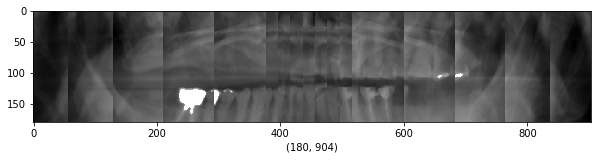

In [15]:
plt.figure(figsize=(10,10))
plt.xlabel(tot.shape)
plt.imshow(tot, cmap='gray')


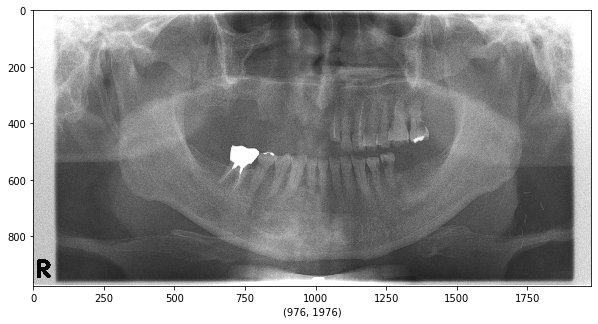

In [16]:
plt.figure(figsize=(10,10))
plt.xlabel(pano.shape)
plt.imshow(pano, cmap='gray')

</br>

## 2. 크기 비교가 어려워 cv 사용해서 load

In [19]:
tot_ = tot.astype(np.uint8)
cv2.imshow("panoramic image", pano)
cv2.imshow("sliced image ", tot_)
cv2.waitKey(0)
cv2.destroyAllWindows()

</br>

## 3. dicom header 정보 csv로 따오기 

In [22]:
import pydicom as pydcm


In [23]:
ds = pydicom.filereader.dcmread("D:/Data/P00072977/CT/S1.2.410.2000010.82.148.900173589/I6510068.dcm")

In [24]:
ds

(0008, 0000) Group Length                        UL: 530
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20191218'
(0008, 0013) Instance Creation Time              TM: '095725'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.250.1.90.2.1995833421.20191218095725.6112.34.1
(0008, 0020) Study Date                          DA: '20191218'
(0008, 0021) Series Date                         DA: '20191218'
(0008, 0022) Acquisition Date                    DA: '20191218'
(0008, 0023) Content Date                        DA: '20191218'
(0008, 0030) Study Time                          TM: '095426'
(0008, 0031) Series Time                         TM: '095725'
(0008, 0032) Acquisition Time                    TM: '095650'
(0008, 0033) Content Time                        